# 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler #(standardize data to common range)
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


# 2. Loading The Data Set

In [2]:
df=pd.read_csv("diabetes.csv")

# 3. Explorartory Data Analysis

## 3.1 Head of The Data Set(top 5)

In [4]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 3.2 Tail of The Data Set(last 5) 

In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## 3.3 Shape of the Data Set(no. of rows and no. of columns)

In [8]:
df.shape

(768, 9)

## 3.4 Info of the dataset

Used to check info about the data and datatypes of each respective attribute

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## 3.5 Summary of the dataset

The describe method will help to see how data has been spread for numerical values. We can clearly see the minimum value, mean value, different percentile values and maximum values.

In [8]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.shape

(768, 9)

# 4 Data Visuzaliation

## 4.1 Count plot

Negative (0):    500
Positive (1):    268


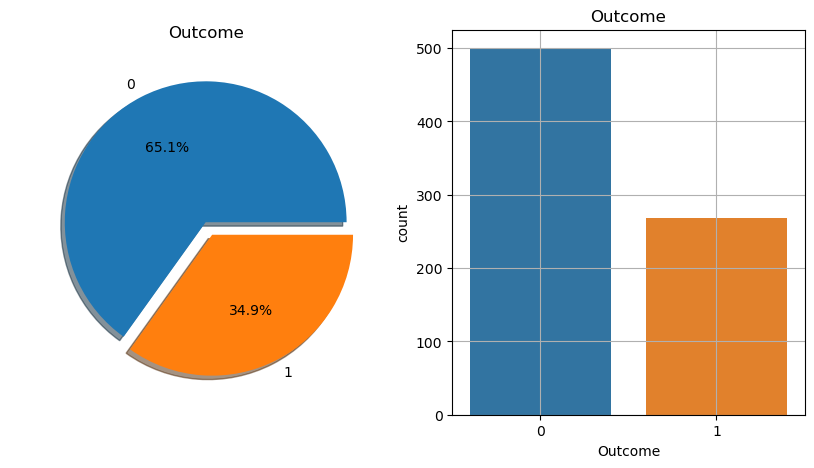

In [3]:
f, ax = plt.subplots(1,2,figsize=(10,5))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0], shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel (' ')
sns.countplot(x='Outcome',data=df,ax=ax[1])
ax[1].set_title('Outcome')
N,P =  df['Outcome'].value_counts()
print( 'Negative (0):   ',N)
print('Positive (1):   ',P)
plt.grid()
plt. show()

## 4.2 Histogram

It is used for display numeric data in form of graphs. It shows the distribution of data.

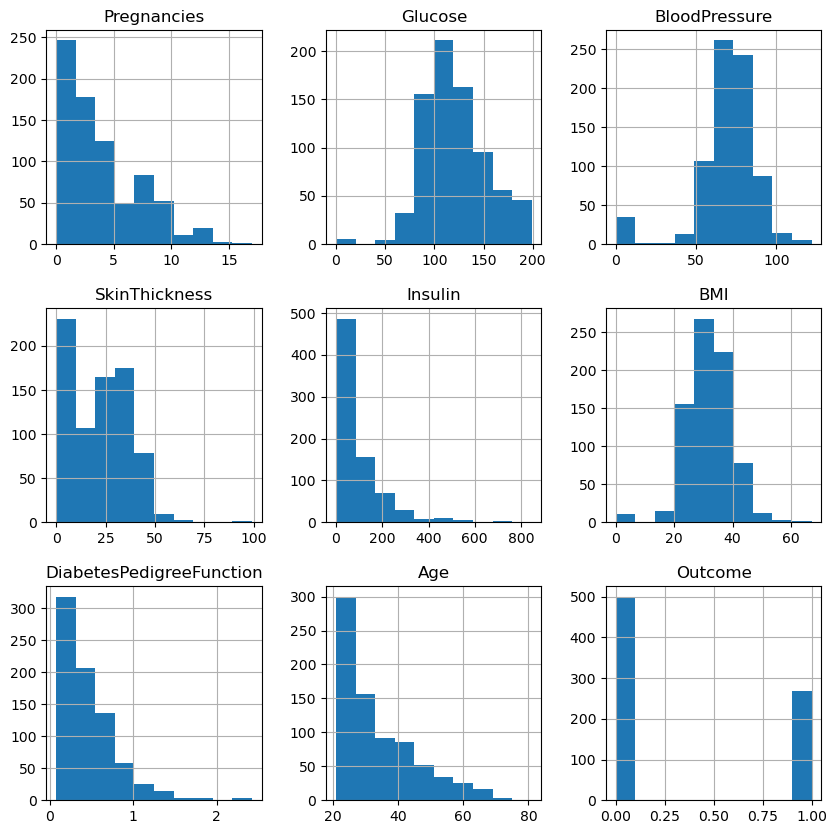

In [10]:
df.hist(bins=10,figsize=(10,10))
plt.show()

## 4.3 Analyzing relationships between variables

### Correlation analysis

Correlation analysis is used to quantify the degree to which two variable are realted. It tells us how much one variable changes when the other one does.


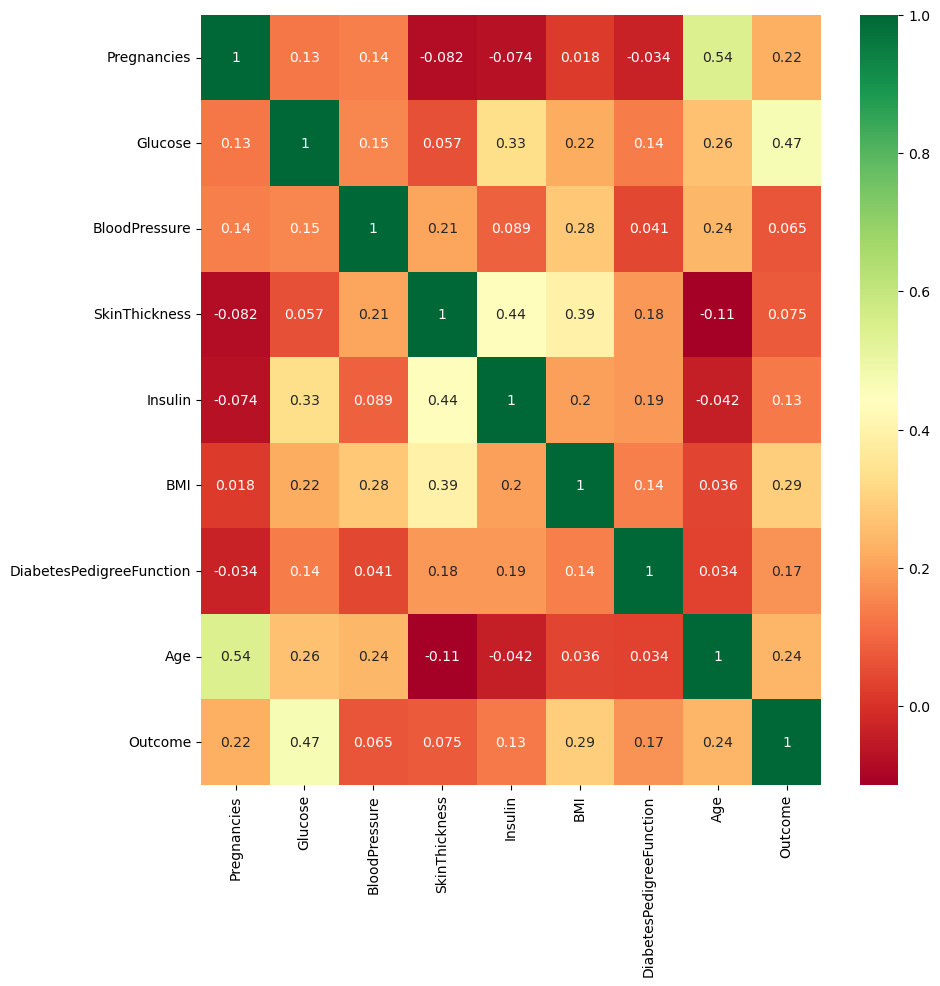

In [5]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True, cmap="RdYlGn")

# 5. Split the Data Frame into X & y

In [4]:
target_name = 'Outcome'

y = df[target_name]

X = df.drop(target_name, axis = 1)


In [8]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [9]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# 6. Apply Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
SSX = scaler.transform(X)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(SSX, y, test_size=0.2, random_state=7)

In [10]:
X_train.shape, y_train.shape

((614, 8), (614,))

In [69]:
X_test.shape, y_test.shape

((154, 8), (154,))

# 7. Build The Classification Algorithms


## 7.1 KNeighboursClassifier (KNN)

In [7]:

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit (X_train, y_train)

KNeighborsClassifier()


## 7.2 Support Vector Machine (SVM)

In [8]:

from sklearn. svm import SVC
sv=SVC ()
sv.fit(X_train,y_train)

SVC()

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier (criterion= 'entropy')
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [10]:
from sklearn. linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear' ,multi_class='ovr')
lr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [11]:
from sklearn. naive_bayes import GaussianNB
nb=GaussianNB ()
nb.fit(X_train, y_train)

GaussianNB()

# 8. Making Prediction

In [13]:

knn_pred=knn. predict(X_test)

In [14]:
sv_pred=sv.predict(X_test)

In [15]:
#Making predictions on test dataset
rf_pred=rf.predict(X_test)

In [16]:
## Making predictions on test dataset
lr_pred=lr.predict(X_test)

In [17]:
## Making predictions on test dataset
nb_pred=nb. predict (X_test)

# 9. Model Evaluation

#  Train score & Test score of KNN

In [18]:
from sklearn.metrics import accuracy_score

print ("Train Accuracy of KNN", knn. score(X_train,y_train)*100)
print ("Accuracy (Test) score of KNN", knn.score(X_test, y_test)*100)
print("Accuracy score of KNN" ,accuracy_score(y_test, knn_pred)*100)

Train Accuracy of KNN 83.87622149837134
Accuracy (Test) score of KNN 72.07792207792207
Accuracy score of KNN 72.07792207792207


# Train score & Test score of Logistic Regression

In [19]:
# Train score & Test score of Logistic Regression
print("Train Accuracy of Logistic Regression",lr.score(X_train,y_train)*100)
print("Accuracy (Test) score of Logistic Regression", lr.score(X_test,y_test)*100)
print ("Accuracy (Test) score of Logistic Regression", accuracy_score (y_test, lr_pred) *100)


Train Accuracy of Logistic Regression 77.68729641693811
Accuracy (Test) score of Logistic Regression 78.57142857142857
Accuracy (Test) score of Logistic Regression 78.57142857142857


# Train score & Test Score of SVM

In [20]:

print("Train Accuracy of SVM", sv.score(X_train,y_train)*100)
print("Accuracy (Test) score of SVM",sv.score(X_test, y_test)*100)
print("Accuracy score of SVM",accuracy_score(y_test,sv_pred)*100)

Train Accuracy of SVM 81.43322475570032
Accuracy (Test) score of SVM 79.87012987012987
Accuracy score of SVM 79.87012987012987


# Train score & Test score of Naive-Bayes

In [21]:

print("Train Accuracy of Naive Bayes", nb. score(X_train,y_train)*100)
print ("Accuracy (Test) score of Naive Bayes", nb. score(X_test, y_test)*100)
print ("Accuracy score of Naive Bayes", accuracy_score(y_test, nb_pred) *100)

Train Accuracy of Naive Bayes 76.0586319218241
Accuracy (Test) score of Naive Bayes 75.32467532467533
Accuracy score of Naive Bayes 75.32467532467533


# Train score & Test score of Random Forest

In [22]:
print ("Train Accuracy of Random Forest", rf. score(X_train,y_train)*100)
print("Accuracy (Test) score of Random Forest", rf.score(X_test, y_test)*100)
print ("Accuracy score of Random Forest", accuracy_score(y_test, rf_pred)*100)

Train Accuracy of Random Forest 100.0
Accuracy (Test) score of Random Forest 80.51948051948052
Accuracy score of Random Forest 80.51948051948052


# 10. Predictive System

### We have taken 10 people's Data and predict their outcome 

In [23]:
patient1=(10,168,74,0,0,38,0.537,34)
patient2=(3,78,50,32,88,31,0.248,26)
patient3=(10,139,80,0,0,27.1,1.441,57)
patient4=(1,189,60,23,846,30.1,0.398,59)
patient5=(5,166,72,19,175,25.8,0.587,51)
patient6=(7,100,0,0,0,30,0.484,32)
patient7=(0,118,84,47,230,45.8,0.551,31)
patient8=(7,107,74,0,0,29.6,0.254,31)
patient9=(1,103,30,38,83,43.3,0.183,33)
patient10=(3,126,88,41,235,39.3,0.704,27)


patient1_numpy=np.asarray(patient1)
patient2_numpy=np.asarray(patient2)
patient3_numpy=np.asarray(patient3)
patient4_numpy=np.asarray(patient4)
patient5_numpy=np.asarray(patient5)
patient6_numpy=np.asarray(patient6)
patient7_numpy=np.asarray(patient7)
patient8_numpy=np.asarray(patient8)
patient9_numpy=np.asarray(patient9)
patient10_numpy=np.asarray(patient10)
patient1_reshape= patient1_numpy.reshape(1,-1)
patient2_reshape=patient2_numpy.reshape(1,-1)
patient3_reshape=patient3_numpy.reshape(1,-1)
patient4_reshape=patient4_numpy.reshape(1,-1)
patient5_reshape=patient5_numpy.reshape(1,-1)
patient6_reshape=patient6_numpy.reshape(1,-1)
patient7_reshape=patient7_numpy.reshape(1,-1)
patient8_reshape=patient8_numpy.reshape(1,-1)
patient9_reshape=patient9_numpy.reshape(1,-1)
patient10_reshape=patient10_numpy.reshape(1,-1)
std_data1= scaler.transform(patient1_reshape)
std_data2= scaler.transform(patient2_reshape)
std_data3= scaler.transform(patient3_reshape)
std_data4= scaler.transform(patient4_reshape)
std_data5= scaler.transform(patient5_reshape)
std_data6= scaler.transform(patient6_reshape)
std_data7= scaler.transform(patient7_reshape)
std_data8= scaler.transform(patient8_reshape)
std_data9= scaler.transform(patient9_reshape)
std_data10= scaler.transform(patient10_reshape)
##print(std_data1)
##print(std_data2)
prediction1=rf.predict(std_data1)
prediction2=rf.predict(std_data2)
prediction3=rf.predict(std_data3)
prediction4=rf.predict(std_data4)
prediction5=rf.predict(std_data5)
prediction6=rf.predict(std_data6)
prediction7=rf.predict(std_data7)
prediction8=rf.predict(std_data8)
prediction9=rf.predict(std_data9)
prediction10=rf.predict(std_data10)
##print(prediction1)
##print(prediction2)
print('RESULTS:')
if (prediction1==0):
    print('Patient 1 is not diabetic')
else: 
    print('Patient 1 is diabetic')
if (prediction2==0):
    print('Patient 2 is not diabetic')
else: 
    print('Patient 2 is diabetic')
if (prediction3==0):
    print('Patient 3 is not diabetic')
else: 
    print('Patient 3 is diabetic')
if (prediction4==0):
    print('Patient 4 is not diabetic')
else: 
    print('Patient 4 is diabetic')
if (prediction5==0):
    print('Patient 5 is not diabetic')
else: 
    print('Patient 5 is diabetic') 
if (prediction6==0):
    print('Patient 6 is not diabetic')
else: 
    print('Patient 6 is diabetic')
if (prediction7==0):
    print('Patient 7 is not diabetic')
else: 
    print('Patient 7 is diabetic')
if (prediction8==0):
    print('Patient 8 is not diabetic')
else: 
    print('Patient 8 is diabetic')
if (prediction9==0):
    print('Patient 9 is not diabetic')
else: 
    print('Patient 9 is diabetic')
if (prediction10==0):
    print('Patient 10 is not diabetic')
else: 
    print('Patient 10 is diabetic')

RESULTS:
Patient 1 is diabetic
Patient 2 is diabetic
Patient 3 is not diabetic
Patient 4 is diabetic
Patient 5 is diabetic
Patient 6 is diabetic
Patient 7 is diabetic
Patient 8 is diabetic
Patient 9 is not diabetic
Patient 10 is not diabetic


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid f

In [26]:
from tabulate import tabulate

In [35]:
columns=['Name','Age','Result']
arr= np.array([['Patient 1',34,'Diabetic'],['Patient 2',26,'Diabetic'],['Patient 3',57,'Not-Diabetic'],['Patient 4',59,'Diabetic'],['Patient 5',51,'Diabetic'],['Patient 6',32,'Diabetic'],['Patient 7',31,'Diabetic'],['Patient 8',31,'Diabetic'],['Patient 9',33,'Not-Diabetic'],['Patient 10',27,'Not-Diabetic']])
print(tabulate(arr, headers=columns, tablefmt="fancy_grid"))

╒════════════╤═══════╤══════════════╕
│ Name       │   Age │ Result       │
╞════════════╪═══════╪══════════════╡
│ Patient 1  │    34 │ Diabetic     │
├────────────┼───────┼──────────────┤
│ Patient 2  │    26 │ Diabetic     │
├────────────┼───────┼──────────────┤
│ Patient 3  │    57 │ Not-Diabetic │
├────────────┼───────┼──────────────┤
│ Patient 4  │    59 │ Diabetic     │
├────────────┼───────┼──────────────┤
│ Patient 5  │    51 │ Diabetic     │
├────────────┼───────┼──────────────┤
│ Patient 6  │    32 │ Diabetic     │
├────────────┼───────┼──────────────┤
│ Patient 7  │    31 │ Diabetic     │
├────────────┼───────┼──────────────┤
│ Patient 8  │    31 │ Diabetic     │
├────────────┼───────┼──────────────┤
│ Patient 9  │    33 │ Not-Diabetic │
├────────────┼───────┼──────────────┤
│ Patient 10 │    27 │ Not-Diabetic │
╘════════════╧═══════╧══════════════╛


In [28]:
columns=['Algorithm Used','Accuracy']
arr=np.array([['KNN Algorithm','72%'],['Logistic Regression Algorithm','78.5%'],['Naive Bayes Algorithm','75.3%'],['SVM Algorithm','79.8%'],['Random Forest','80.5%']])
print(tabulate(arr, headers=columns, tablefmt="fancy_grid"))

╒═══════════════════════════════╤════════════╕
│ Algorithm Used                │ Accuracy   │
╞═══════════════════════════════╪════════════╡
│ KNN Algorithm                 │ 72%        │
├───────────────────────────────┼────────────┤
│ Logistic Regression Algorithm │ 78.5%      │
├───────────────────────────────┼────────────┤
│ Naive Bayes Algorithm         │ 75.3%      │
├───────────────────────────────┼────────────┤
│ SVM Algorithm                 │ 79.8%      │
├───────────────────────────────┼────────────┤
│ Random Forest                 │ 80.5%      │
╘═══════════════════════════════╧════════════╛
